In [2]:
import scipy.io as sio
from scipy.fft import fft
import os,glob
import math
import numpy as np

In [3]:
from mat4py import loadmat

def get_neck_files(dirname, filepatern):
    files = []
    for filename in glob.iglob(os.path.join(dirname, filepatern), recursive=True):
        files.append(filename)
    return files


def wfft_hz(filename, Hz_Lthr, Hz_Hthr):
    '"Lthr: lower threshold; Hthr: high threshold"'
    data = loadmat(filename)
    fft_data = fft(data['data'])
    NFFT = math.floor(len(data['data'])/2)+1
    fft_data = abs(fft_data[1:NFFT])
    f = data['Fs']/2 * np.linspace(0, 1, NFFT)
    idx = [i for i, e in enumerate(f) if e <= Hz_Hthr] 
    X=f[idx]
    y=fft_data[idx]
    return X, y
    

In [18]:
def findFftAverageAndWriteXls(dirname, filepatern, Hz_Lthr, Hz_Hthr, outfile):
    files = get_neck_files(dirname, filepatern)
    avg=0
    X_=0
    for filename in files:
        [X,y] =  wfft_hz(filename, Hz_Lthr, Hz_Hthr)
        avg=avg+y/max(y)
        X_=X
    if(len(files) > 0):
        avg=avg/len(files)
        #pyexcel.save_as(array=[X_, avg], dest_file_name=dirname+outfile+'.xls')
        [X_, avg]
        

In [19]:
import os,glob
import pyexcel

folder_paths = ['../datasets/Age_A/Age_A_Male/', '../datasets/Age_A/Age_A_Female/']
pat={'*Neck_L_A*.mat', '*Neck_R_A*.mat'}
name={'L_avg', 'R_avg'}
Hz_Lthr, Hz_Hthr = 0, 10

for folder_path in folder_paths:
    for dirname in glob.iglob(os.path.join(folder_path, '**/')):
        findFftAverageAndWriteXls(dirname, '**/*Neck_R_A*.mat', Hz_Lthr, Hz_Hthr,'R_avg')
        #findFftAverageAndWriteXls(dirname, '**/*Neck_L_A*.mat', Hz_Lthr, Hz_Hthr,'L_avg')

In [5]:
files =  [ '../datasets/Age_A/Age_A_Female/Sub 25/25Neck_L_A_1.mat',
'../datasets/Age_A/Age_A_Female/Sub 28/28Neck_L_A_1.mat',
'../datasets/Age_A/Age_A_Female/Sub 32/32Neck_L_A_1.mat',
'../datasets/Age_A/Age_A_Male/Sub 70/70neck_L_A_3 .mat',
'../datasets/Age_A/Age_A_Male/Sub 73/73Neck_R_A_2 .mat',
'../datasets/Age_A/Age_A_Male/Sub 77/76_R_NECK_A_1.mat']

In [6]:
def plotFFT(X, y, filename):
    fig, ax = plt.subplots()
    ax.plot(X, y)
    ax.set_xlabel('Hz')
    ax.set_ylabel('FFT magnitude');
    plt.xlim(Hz_Lthr, Hz_Hthr)
    plt.xticks(np.arange(0, Hz_Hthr, 1.0))
    plt.title(filename)

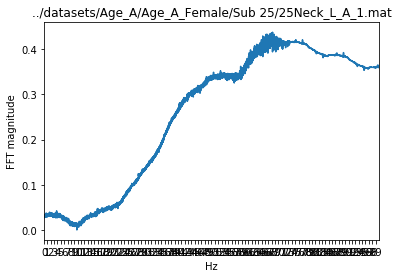

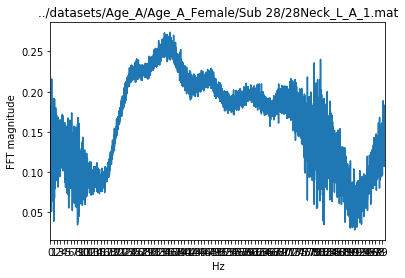

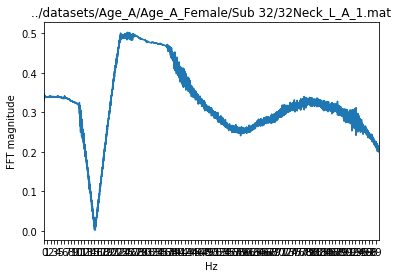

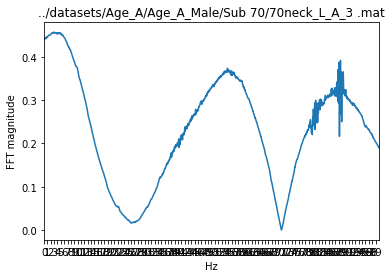

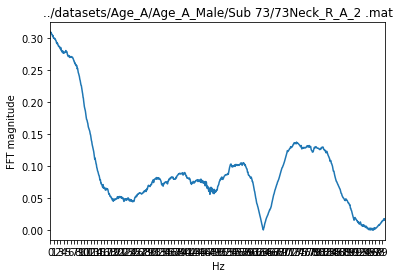

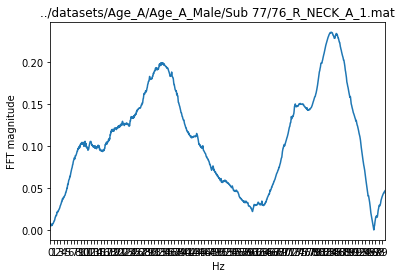

In [10]:
import matplotlib.pyplot as plt

Hz_Lthr, Hz_Hthr=0, 100
for file in files:
    [X,y] =  wfft_hz(file, 0, 100)
    plotFFT(X,y, file)
plt.show()
        